# `Материалы кафедры ММП факультета ВМК МГУ. Введение в глубокое обучение.`

## `Задание 3.5. Трансформеры для Named Entity Recognition`

#### Фамилия, имя: Голубев Роман

Дата выдачи: <span style="color:red">__27 марта 23:59__</span>.

Мягкий дедлайн: <span style="color:red">__06 апреля 05:00__</span>.

Стоимость: __10 баллов__ (основная часть заданий)

<span style="color:red">__В ноутбуке все клетки должны выполняться без ошибок при последовательном их выполнении.__</span>

#### `Москва, 2025`

В рамках этого задания вы научитесь:
1. Загружать датасеты и претренированные модели из [Hugging face Hub](https://huggingface.co)
2. Манипулировать текстовыми датасетами с помощью библиотеки [datasets](https://huggingface.co/docs/datasets/index)
3. Запускать и обучать трансформеры с помощью библиотеки [transformers](https://huggingface.co/docs/transformers/index)
4. Промптить большую языковую модель на примере [Qwen2.5-7B-Instruct](https://huggingface.co/Qwen/Qwen2.5-7B-Instruct)
5. Оптимизировать гиперпараметры с помощью библиотеки [optuna](https://optuna.org/)

При выполнении задания вы будете решать стандартную задачу классификации токенов: распознавание именованных сущностей.

Задание состоит из трёх частей:
1. Обработка данных и работа с датасетами из Hugging Face.
2. Практика больших языковых моделей.
3. Дообучение трансформера.

Обратите свое внимание на [официальный гайд](https://huggingface.co/learn/nlp-course/chapter7/2), в котором подробно разбирается задача классификации токенов.

## `Часть 1. Загрузка и предобработка (4 балла)`

### `Подготовка среды Kaggle`

**Хранение ключей**: Kaggle Secrets --- инструмент для безопасного хранения и использования в ноутбуках Kaggle API-ключей, паролей или токенов.

Для добавления нового ключа:
1. Перейдите в Add-ons --> secrets
2. Add secret для добавления нового ключа. Доступ к ключу из ноутбука осуществляется с помощью пакета kaggle_secrets
3. Коллекция ключей общая для всех ноутбуков пользователя на kaggle. Но в каждом ноутбуке необходимо выбрать ключи, которые будут доступны через kaggle_secrets

Ниже находится пример подгрузки ключей для kaggle и wandb.

In [1]:
# from kaggle_secrets import UserSecretsClient
# import os

# api_keys = UserSecretsClient()

# os.system(f"huggingface-cli login --token {api_keys.get_secret('huggingface-cli')}")
# os.system(f"wandb login {api_keys.get_secret('wandb')}")

**Установка домашнего каталога**: Если мы хотим контролировать путь, по которому будут загружаться датасеты, чекпоинты моделей и т.д., то стоит задать переменную среды `HF_HOME`. При использовании kaggle перемещение домашнего каталога huggingface в директорию working позволит избежать повторной загрузки при перезапуске ноутбука (не забудьте установить "persistence: files only" в настройках kaggle-ноутбука)

In [2]:
# Optional

# os.environ['HF_HOME'] = '/kaggle/working/hf_hub'

### `Подготовка среды Google Colab`

Секреты можно настроить в колабе:

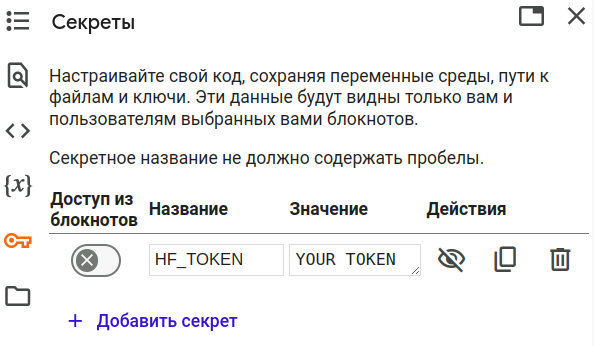

### `Общая подготовка`

In [3]:
!pip install gcsfs==2024.3.1 -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 5.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-nvrtc-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-nvrtc-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-runtime-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-runtime-cu12 12.5.82 which is incomp

In [4]:
!pip install --upgrade datasets -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 15.0 MB/s eta 0:00:00


In [5]:
!pip install fsspec==2024.3.1 -q

In [6]:
# pip offers the --quiet / -q option to silence output

! pip install transformers[torch] datasets autoawq evaluate seqeval optuna -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.6/71.6 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.4/107.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 74.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

При работе с библиотеками часто бывает важно соблюдение версий. Задание тестировалось на Python 3.12 при версиях библиотек указанных ниже.

In [7]:
!pip freeze > requirements.txt
!cat requirements.txt | grep torch

torch @ https://download.pytorch.org/whl/cu124/torch-2.6.0%2Bcu124-cp311-cp311-linux_x86_64.whl
torchaudio @ https://download.pytorch.org/whl/cu124/torchaudio-2.6.0%2Bcu124-cp311-cp311-linux_x86_64.whl
torchsummary==1.5.1
torchvision @ https://download.pytorch.org/whl/cu124/torchvision-0.21.0%2Bcu124-cp311-cp311-linux_x86_64.whl


In [8]:
!cat requirements.txt | grep transformers
!cat requirements.txt | grep datasets
!cat requirements.txt | grep autoawq
!cat requirements.txt | grep evaluate
!cat requirements.txt | grep seqeval
!cat requirements.txt | grep optuna

sentence-transformers==3.4.1
transformers==4.50.3
datasets==3.5.0
tensorflow-datasets==4.9.8
vega-datasets==0.9.0
autoawq==0.2.7.post3
evaluate==0.4.3
seqeval==1.2.2
optuna==4.2.1


In [9]:
import gc
import json
import random
from typing import Any, Union
from pathlib import Path

import numpy as np
import numpy.typing as npt

import torch
import datasets
from transformers import (
    AutoTokenizer,
    AutoModelForTokenClassification,
    TextGenerationPipeline,
    pipeline,
    DataCollatorForTokenClassification,
    TrainingArguments,
    Trainer
)
from transformers.trainer_callback import EarlyStoppingCallback

import optuna
import evaluate

torch.backends.cudnn.benchmark = True
torch.use_deterministic_algorithms(False)

torch.autograd.profiler.profile(False)
torch.autograd.profiler.emit_nvtx(False)
torch.autograd.set_detect_anomaly(False)

torch.set_float32_matmul_precision('high')
torch.backends.cuda.matmul.allow_tf32 = True

In [10]:
def set_global_seed(seed: int) -> None:
    """Set global seed for reproducibility.
    :param int seed: Seed to be set
    """
    random.seed(seed)
    np.random.seed(seed)

    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

def print_params_count(model):

    total_params = sum(p.numel() for p in model.parameters())
    total_params_grad = sum(p.numel() for p in model.parameters() if p.requires_grad)

    model_name = model.__class__.__name__
    print(f"Информация о числе параметров модели: {model_name}")
    print(f"Всего параметров: \t\t {total_params}")
    print(f"Всего обучаемых параметров: \t {total_params_grad}")
    print()

set_global_seed(42)

На протяжении всего задания вы можете добавлять любой `import`, иногда, это и являются частью задания. При работе с большими библиотеками очень важно уметь читать документацию и использовать гугл для поиска информации.

Для выполнения задания необходимо использование GPU!

In [11]:
if not torch.cuda.is_available():
    print("You need GPU!!!")

### `Загрузка данных (0.25 балла)`

В первую очередь, Hugging Face --- это хаб с датасетами и моделями. Загрузите готовый датасет [отсюда](https://huggingface.co/datasets/voorhs/conll2003-corrupted).

Подсказка: почитайте [туториал](https://huggingface.co/docs/datasets/load_hub).

*Если не получится сразу, то лучше перед следующими попытками перезапустить ноутбук.*

In [13]:
from huggingface_hub import login
from google.colab import userdata
token = userdata.get('for_colab')
login(token)

In [14]:
from datasets import load_dataset
dataset = load_dataset("voorhs/conll2003-corrupted")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/2.28k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.37M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/309k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/281k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/14041 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3250 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3453 [00:00<?, ? examples/s]

**Вопрос**: Какие поля нам доступны? Напечатайте пару примеров из каждого сплита. Попытайтесь догадаться какой смысл имеет каждое поле и опишите в двух словах.

*Подсказка:* почитайте [туториал](https://huggingface.co/docs/datasets/access).

In [15]:
print("Поля:", dataset.keys())
for split in dataset.keys():
    print(f"\nПример из поля {split}:")
    print(dataset[split][0])

Поля: dict_keys(['train', 'validation', 'test'])

Пример из поля train:
{'id': '473', 'tokens': ['LONDON', '1996-08-22'], 'pos_tags': [22, 11], 'chunk_tags': [11, 12], 'ner_tags': ['B-LOC', 'O']}

Пример из поля validation:
{'id': '0', 'tokens': ['CRICKET', '-', 'LEICESTERSHIRE', 'TAKE', 'OVER', 'AT', 'TOP', 'AFTER', 'INNINGS', 'VICTORY', '.'], 'pos_tags': [22, 8, 22, 22, 15, 22, 22, 22, 22, 21, 7], 'chunk_tags': [11, 0, 11, 12, 13, 11, 12, 12, 12, 12, 0], 'ner_tags': ['O', 'O', 'B-ORG', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']}

Пример из поля test:
{'id': '0', 'tokens': ['SOCCER', '-', 'JAPAN', 'GET', 'LUCKY', 'WIN', ',', 'CHINA', 'IN', 'SURPRISE', 'DEFEAT', '.'], 'pos_tags': [21, 8, 22, 37, 22, 22, 6, 22, 15, 12, 21, 7], 'chunk_tags': [11, 0, 11, 21, 11, 12, 0, 11, 13, 11, 12, 0], 'ner_tags': ['O', 'O', 'B-LOC', 'O', 'O', 'O', 'O', 'B-PER', 'O', 'O', 'O', 'O']}


**Ответ:** pos - метки части речи, ner - метки имён собственных, chunk - метки для фразовых групп (разбиение текста на логические части)

### `Удаление колонок (0.25 балла)`

Мы будем предсказывать NER tags непосредственно по тексту. Остальная информация нам не понадобится. Удалите все колонки кроме `tokens` и `ner_tags`.

*Подсказка:* почитайте [туториал](https://huggingface.co/docs/datasets/process#remove).

In [16]:
dataset = dataset.remove_columns(['id', 'pos_tags', 'chunk_tags'])

dataset


DatasetDict({
    train: Dataset({
        features: ['tokens', 'ner_tags'],
        num_rows: 14041
    })
    validation: Dataset({
        features: ['tokens', 'ner_tags'],
        num_rows: 3250
    })
    test: Dataset({
        features: ['tokens', 'ner_tags'],
        num_rows: 3453
    })
})

### `Сбор тегов (0.25 балла)`

Обратите внимание,что в датасете представлена **BIO-разметка**.

**BIO-разметка** -- это способ аннотации текста для распознавания именованных сущностей (NER), где **B** (Beginning) обозначает начало сущности, **I** (Inside) — продолжение той же сущности, а **O** (Outside) — отсутствие сущности.

Например, в предложении *"Apple выпустила новый iPhone"* разметка будет: *"Apple/B-ORG выпустила/O новый/O iPhone/B-PRODUCT"*.

В предложении  *"Билл Гейтс основал Microsoft"* -- *"Билл/B-PER Гейтс/I-PER основал/O Microsoft/B-ORG"*.

**Такой формат помогает моделям точно определять границы и типы сущностей.**



Прежде чем работать с датасетом, необходимо понять, какие именно NER-теги присутствуют в данных. Напечатайте все уникальные значения NER-тегов, которые встречаются в датасете.

*Подсказка:* по датасету можно итерироваться с помощью конструкции `for ... in`

**Вопрос:**
- есть ли какие-то подозрительные теги, которых быть не должно?

In [17]:
unique_ner_tags = set()
for split in dataset.keys():
    for example in dataset[split]:
        unique_ner_tags.update(example['ner_tags'])
print(unique_ner_tags)

{'B-MISC', 'B-PER', 'MISSING', 'I-ORG', 'O', 'B-ORG', 'B-LOC', 'I-PER', 'I-LOC', 'I-MISC'}


да, тег Missing подозрительный

Для вычисления лосс функции и подсчета метрик нам потребуется перевести теги в классы, так как мы будем решать задачу классификации.

Создайте мапинги тегов:
- `label2id`: строковое представление тега (например `B-PER`) -> индекс класса
- `id2label`: наоборот

Исключите из них подозрительные теги, которых не должно быть.

*Подсказка:* должно получиться 9 тегов

In [18]:
valid_tags = sorted(tag for tag in unique_ner_tags if tag != "MISSING")
id2label = [label for label in valid_tags]

id2label

['B-LOC', 'B-MISC', 'B-ORG', 'B-PER', 'I-LOC', 'I-MISC', 'I-ORG', 'I-PER', 'O']

In [19]:
label2id = {name: i for i, name in enumerate(id2label)}
label2id

{'B-LOC': 0,
 'B-MISC': 1,
 'B-ORG': 2,
 'B-PER': 3,
 'I-LOC': 4,
 'I-MISC': 5,
 'I-ORG': 6,
 'I-PER': 7,
 'O': 8}

### `Фильтрация (0.25 балла)`

В обучающей выборке для части объектов пропущена разметка. Разделите обучающую выборку на размеченные и неразмеченные объекты. Напечатайте размеры обеих частей.

*Подсказка:* прочитайте [туториал](https://huggingface.co/docs/datasets/process#select-and-filter). Фильтрацию датасета можно написать в одну строчку.

In [20]:
from datasets import DatasetDict
dataset_raw_essential = DatasetDict()
dataset_raw_essential["train_missing"] = dataset['train'].filter(lambda x: 'MISSING' in x['ner_tags'])
dataset_raw_essential["train"] = dataset['train'].filter(lambda x: 'MISSING' not in x['ner_tags'])
dataset_raw_essential["validation"] = dataset["validation"]
dataset_raw_essential["test"] = dataset["test"]
dataset_raw_essential

Filter:   0%|          | 0/14041 [00:00<?, ? examples/s]

Filter:   0%|          | 0/14041 [00:00<?, ? examples/s]

DatasetDict({
    train_missing: Dataset({
        features: ['tokens', 'ner_tags'],
        num_rows: 4041
    })
    train: Dataset({
        features: ['tokens', 'ner_tags'],
        num_rows: 10000
    })
    validation: Dataset({
        features: ['tokens', 'ner_tags'],
        num_rows: 3250
    })
    test: Dataset({
        features: ['tokens', 'ner_tags'],
        num_rows: 3453
    })
})

In [21]:
assert len(dataset_raw_essential["train_missing"]) == 4041

### `Получение tokenizer-independent представления (2 балла)`

Имеющаяся BIO-разметка построена для токенизатора, который нам, к сожалению, **не известен**. Необходимо построить tokenizer-independent представление нашего датасета.

**Восстановление текста**: Для каждого объекта датасета необходимо объединить токены из `tokens` в единую строку и поместить в поле `text`. Необходимо учесть, что знаки препинания, кавычки и скобки (например, `,`, `.`, `!`. `)`, `"`) не должны иметь пробелов перед собой, но должны иметь пробел после себя.

**Изменение BIO-разметки**: Так как каждый токенизатор по-своему разобьет полученный `text`, то необходимо уметь строить BIO-разметку для любого токенизатора.

По имеющейся BIO-разметке необходимо:
* Оставить только последовательность сущностей, удалив префиксы начала (B- и I-).
* Для каждой именованной сущности найти позиции символов, ей соответствующие (в формате python slice).

Пример результата:
```python
{
    'text': '6 - Andre Agassi (U.S.) vs. Mauricio Hadad (Colombia)',
    'tags': ['PER', 'LOC', 'PER','LOC'],
    'ranges': [[4, 16], [19, 23], [30, 44], [47, 55]]
}
```

*Пояснение к примеру*. В тексте `'6 - Andre Agassi (U.S.) vs. Mauricio Hadad (Colombia)'` встретилось четыре сущности:
- `PER` на позициях `[4,16]`, а именно `Andre Agassi`
- `LOC` на позициях `[19,23]`, а именно `U.S.`
- `PER` на позициях `[30,44]`, а именно `Mauricio Hadad`
- `LOC` на позициях `[47,55]`, а именно `Colombia`

**Важно:**
- Полученный результат сохраните на диск (например по пути `./data/generic`)
- Подробности о названиях аргументов и возвращаемых значениях берите из докстринга функции `transform_ner_data`

In [22]:
def transform_ner_data(tokens: list[str], ner_tags: list[str]):
    """
    Obtain tokenizer-independent representation of a single sample.

    Args:
        tokens: list of words, subwords or even punctuations
        ner_tags: list of BIO labels
    Returns:
        sample: dictionary with the following contents:
            - text (str): detokenized sequence
            - tags (list[str]): list of tags names (PER, ORG, LOC, MISC)
            - ranges (list[tuple[int, int]]): list of python slices for each entity
    """

    punctuation_symbols = ("-", "'", ".", ",", ")", ":", ";", '"')

    text = ""
    ranges = []
    tags = []

    # declare vars if you needed
    entity_start = None
    entity_tag = None

    for token, tag in zip(tokens, ner_tags):
        # Adjust spacing based on token type
        if len(text) > 0 and not token.startswith(
            punctuation_symbols
        ):
            text += " "

        token_start = len(text)
        text += token
        token_end = len(text)
        # Handle entity tagging
        if tag.startswith("B-"):  # Begin a new entity
            # Close the previous entity
            if entity_tag is not None:
                ranges.append([entity_start, prev_token_end])
                tags.append(entity_tag)
            entity_start = token_start
            entity_tag = tag[2:]


        elif tag.startswith("I-"):  # Continue an entity
            if entity_tag != tag[2:]:
                if entity_tag is not None:
                    ranges.append([entity_start, prev_token_end])
                    tags.append(entity_tag)
                entity_start = token_start
                entity_tag = tag[2:]
        else:  # Tag is "O" or unrelated, close any open entity
            if entity_tag is not None:
                ranges.append([entity_start, prev_token_end])
                tags.append(entity_tag)
                entity_start = None
                entity_tag = None
        prev_token_end = token_end

    # Close any open entity at the end
    if entity_tag is not None:
        ranges.append([entity_start, prev_token_end])
        tags.append(entity_tag)
    # Final output
    return {"text": text, "tags": tags, "ranges": ranges}

Проверьте, что все работает:

In [23]:
dataset_generic = dataset_raw_essential.map(
    function=transform_ner_data,
    input_columns=["tokens", "ner_tags"],
    remove_columns=dataset_raw_essential["train"].column_names,
)

dataset_generic

Map:   0%|          | 0/4041 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

Map:   0%|          | 0/3250 [00:00<?, ? examples/s]

Map:   0%|          | 0/3453 [00:00<?, ? examples/s]

DatasetDict({
    train_missing: Dataset({
        features: ['text', 'tags', 'ranges'],
        num_rows: 4041
    })
    train: Dataset({
        features: ['text', 'tags', 'ranges'],
        num_rows: 10000
    })
    validation: Dataset({
        features: ['text', 'tags', 'ranges'],
        num_rows: 3250
    })
    test: Dataset({
        features: ['text', 'tags', 'ranges'],
        num_rows: 3453
    })
})

In [24]:
assert dataset_generic["train"][:3] == {
    "text": [
        "LONDON 1996-08-22",
        "WorldCom, which said it will buy MFS, shed 1-3/4 to close at 21 while MFS lost 3-8/16 to close at 41-5/16.",
        "6- Andre Agassi ( U.S.) vs. Mauricio Hadad ( Colombia)",
    ],
    "tags": [["LOC"], ["ORG", "ORG", "ORG"], ["PER", "LOC", "PER", "LOC"]],
    "ranges": [
        [[0, 6]],
        [[0, 8], [33, 36], [70, 73]],
        [[3, 15], [18, 22], [28, 42], [45, 53]],
    ],
}

Сохраните результат на диск (используйте функции из библиотеки `datasets`):

In [25]:
dataset_generic.save_to_disk("./data/generic")

Saving the dataset (0/1 shards):   0%|          | 0/4041 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/10000 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/3250 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/3453 [00:00<?, ? examples/s]

### `Токенизация (1 балл)`

Для отладки воспользуемся токенизатором модели `google-bert/bert-base-uncased`.

In [26]:
from transformers import AutoTokenizer

bert_tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [27]:
print(bert_tokenizer(dataset_generic["train"]["text"][11]))

{'input_ids': [101, 3078, 3707, 6434, 2001, 27502, 1010, 6352, 11000, 1010, 2403, 1012, 1019, 3867, 2062, 2084, 2197, 2251, 1998, 1014, 1012, 1015, 3867, 2062, 2084, 1999, 2238, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


У каждого токенизатора есть свои специальные токены, для получения этой информации можно воспользоваться соотвествующей переменной.

In [28]:
bert_tokenizer.all_special_ids

[100, 102, 0, 101, 103]

Теперь надо написать функцию, которая по имеющуемуся tokenizer-independent представлению выдает BIO-разметку для предоставленного токенизатора.  Реализуйте функцию `align_tokens_and_tags`, которая трансформирует один объект из датасета. Все подробности о формате входных данных берите из докстринга.

**Важно:** служебные токены, добавляемые токенизатором должны иметь специальный лейбл `SPECIAL_TOKENS_LABEL`, т.к. их не надо учитывать при сборе лосса.

In [29]:
SPECIAL_TOKENS_LABEL = -100


def align_tokens_and_tags(
    text: str, tags: list[str], ranges: list[tuple[int, int]], tokenizer: AutoTokenizer
):
    """
    Align the tokenizer-independent representation with a Hugging Face tokenizer.

    Args:
        text: original text.
        tags: list of entity tags (e.g., ["PER", "LOC"]).
        ranges: list of (start, end) character ranges for each entity.
        tokenizer: A Hugging Face tokenizer.

    Returns:
        dict: A dictionary with `input_ids`, `labels`:
            - input_ids are tokens indices in tokenizer's vocabulary
            - labels are integer labels for BIO tags (from label2id mapping)

    Note:
        This function
    """
    encoding = tokenizer(
        text, return_offsets_mapping=True, truncation=True, padding=False
    )
    tokens = tokenizer.convert_ids_to_tokens(encoding["input_ids"])
    token_ids = encoding["input_ids"]
    offset_mapping = encoding["offset_mapping"]


    # Initialize BIO tags for each token
    labels = [label2id["O"]] * len(token_ids)
    for i, (start, end) in enumerate(offset_mapping):
        if start == end:
            labels[i] = SPECIAL_TOKENS_LABEL


    # Map character ranges to token indices
    for tag, (start, end) in zip(tags, ranges):
        # Find tokens that overlap with the entity range
        entity_started = False
        for (i, (token_start, token_end)), token_id in zip(
            enumerate(offset_mapping), token_ids
        ):
            # detect no overlap
            if token_end <= start or token_start >= end:
                continue

            # classifier token
            #     hint: use if
            if not entity_started:
                labels[i] = label2id[f"B-{tag}"]
                entity_started = True
            else:
                labels[i] = label2id[f"I-{tag}"]
    return {
        "input_ids": token_ids,
        "labels": labels # don't forget to handle special tokens
    }

In [30]:
def tokenize_ner_dataset(
    dataset: Union[datasets.DatasetDict, datasets.Dataset], tokenizer: AutoTokenizer
):
    return dataset.map(
        function=align_tokens_and_tags,
        input_columns=["text", "tags", "ranges"],
        fn_kwargs={"tokenizer": tokenizer},
        remove_columns=(
            dataset["train"] if "train" in dataset else dataset
        ).column_names,
    )

Вот пара примеров того, что должно получиться:

In [31]:
for i in range(9, 12):
    sample = dataset_generic["train"][i]
    print("before tokenization:", sample)
    tokenized_sample = align_tokens_and_tags(**sample, tokenizer=bert_tokenizer)
    print("after tokenization:", tokenized_sample)
    print()

before tokenization: {'text': '1-0.', 'tags': [], 'ranges': []}
after tokenization: {'input_ids': [101, 1015, 1011, 1014, 1012, 102], 'labels': [-100, 8, 8, 8, 8, -100]}

before tokenization: {'text': 'Puchon 3 Chonan 0 ( halftime 1-0)', 'tags': ['ORG', 'ORG'], 'ranges': [[0, 6], [9, 15]]}
after tokenization: {'input_ids': [101, 16405, 24561, 1017, 16480, 7229, 1014, 1006, 22589, 1015, 1011, 1014, 1007, 102], 'labels': [-100, 2, 6, 8, 2, 6, 8, 8, 8, 8, 8, 8, 8, -100]}

before tokenization: {'text': 'Primary iron output was 297,700 tonnes, 14.5 percent more than last July and 0.1 percent more than in June.', 'tags': [], 'ranges': []}
after tokenization: {'input_ids': [101, 3078, 3707, 6434, 2001, 27502, 1010, 6352, 11000, 1010, 2403, 1012, 1019, 3867, 2062, 2084, 2197, 2251, 1998, 1014, 1012, 1015, 3867, 2062, 2084, 1999, 2238, 1012, 102], 'labels': [-100, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, -100]}



Тесты:

In [32]:
dataset_tokenized = tokenize_ner_dataset(dataset_generic, bert_tokenizer)

Map:   0%|          | 0/4041 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

Map:   0%|          | 0/3250 [00:00<?, ? examples/s]

Map:   0%|          | 0/3453 [00:00<?, ? examples/s]

In [33]:
assert dataset_tokenized["train"][5:7] == {
    "input_ids": [
        [
            101,
            2002,
            2596,
            2000,
            2031,
            2042,
            2730,
            2006,
            9857,
            2305,
            1010,
            6114,
            2012,
            2560,
            2809,
            17079,
            8710,
            1012,
            102,
        ],
        [
            101,
            1023,
            1012,
            13093,
            6178,
            25185,
            1006,
            5706,
            1007,
            8902,
            4877,
            13181,
            2361,
            3590,
            102,
        ],
    ],
    "labels": [
        [-100, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, -100],
        [-100, 8, 8, 3, 7, 7, 8, 0, 8, 2, 6, 6, 6, 8, -100],
    ],
}

## `Часть 2. Доразметка с помощью LLM (2 балла)`

Наконец, обратимся к трансфомерам! Причем сразу к большим.

Мы воспользуемся моделью `Qwen2.5` на 7 миллиардов параметров. Посмотреть актуальный лидерборд различных LLM [можно тут](https://lmarena.ai/). Кроме того, во вкладке direct chat можно пообщаться с различными LLM бесплатно.

### `Промт инжиниринг`

Для удобства парсинга, мы будем просить LLM возвращать ответы сразу в формате `json` словаря.

Напишите промт, в котором перечислите и опишите поля словаря, которые вы хотите получать от LLM.

**Важно:** скорее всего, вы будете возвращаться к этому заданию и редактировать промт, чтобы улучшить качество дальшейших шагов.

*Подсказка:* попросите LLM добавить в словарь отдельное поле `reasoning`, в которую она поместит рассуждения

In [34]:
def messages_maker(text: str) -> list[dict[str, str]]:
    """
    Creates a prompt for the LLM inference to generate NER labels.

    Args:
        text: The input text to be labeled.
    Returns:
        list: A list of messages formatted for the LLM inferemce.
    """
    system_message = (
        "You are an expert in Named Entity Recognition (NER). Your task is to analyze the given text and identify "
        "entities such as persons (PER), locations (LOC), organizations (ORG), and miscellaneous (MISC). "
        "You must return the results in a specific JSON format with the following fields: "
        "The 'reasoning' field should contain all your initial thoughts for solving NER task. "
        ##############
            "You must return the results in a specific JSON format with the following fields:\n\n"
    "1. 'tags' (list of str): A list of entity types in the order they appear (e.g., ['PER', 'ORG', 'LOC']).\n"
    "2. 'spans' (list of [start, end]): Each entity must be represented by a pair of integers specifying the "
    "start and end character positions (Python slice-style: end is exclusive).\n"
    "3. 'entities' (list of str): A list of the actual entity substrings from the text.\n"
    "4. 'reasoning' (str): Your full reasoning for how you identified these entities, including why you chose "
    "certain tokens as entities and why you assigned them particular tags.\n\n"
    "Return only a JSON dictionary following this format, with no extra commentary outside the JSON. "
    "Make sure the spans are accurate character positions in the text."
        ##############
    )

    user_message = f"Please analyze the following text and generate the NER labels as described:\n\n{text}"

    messages = [
        {"role": "system", "content": system_message},
        {"role": "user", "content": user_message},
    ]

    return messages

Для обработки одного примера будем использовать функцию `generate_answer`.

**Важно:** чтобы понимать, как это работает, почитайте [туториал](https://huggingface.co/docs/transformers/main/en/conversations#textgenerationpipeline).

In [35]:
def generate_answer(generator: TextGenerationPipeline, query: str) -> str:
    chat = generator(messages_maker(query), max_new_tokens=1024)[0]["generated_text"]
    return chat[-1]["content"]

Эта функция отправляет текстовый запрос `query` большой языковой модели и возвращает ответ:

In [36]:
from transformers import pipeline


model_name = "Qwen/Qwen2.5-7B-Instruct-AWQ"

generator = pipeline(model=model_name, task="text-generation", device="cuda")
print(type(generator))

config.json:   0%|          | 0.00/841 [00:00<?, ?B/s]

You have loaded an AWQ model on CPU and have a CUDA device available, make sure to set your model on a GPU device in order to run your model.
`low_cpu_mem_usage` was None, now default to True since model is quantized.


model.safetensors.index.json:   0%|          | 0.00/62.7k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.00G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/1.57G [00:00<?, ?B/s]

Sliding Window Attention is enabled but not implemented for `sdpa`; unexpected results may be encountered.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/243 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

Device set to use cuda


<class 'transformers.pipelines.text_generation.TextGenerationPipeline'>


In [37]:
print_params_count(generator.model)

Информация о числе параметров модели: Qwen2ForCausalLM
Всего параметров: 		 1090199040
Всего обучаемых параметров: 	 1090199040



In [38]:
generate_answer(generator, "I live in London, but my father is from Germany.")

'{\n  "tags": [\n    "LOC", \n    "LOC", \n    "LOC"\n  ], \n  "spans": [\n    [9, 15], \n    [21, 28], \n    [36, 42]\n  ], \n  "entities": [\n    "London", \n    "Germany", \n    "father"\n  ], \n  "reasoning": "In the text, \'London\' and \'Germany\' are both cities, which fall under the location category (LOC). \'father\' is mentioned but does not correspond to any known person\'s name, so it is classified as miscellaneous (MISC). However, since MISC is not one of the specified categories, it is omitted. The spans indicate the start and end positions of each entity in the text."\n}'

In [39]:
generate_answer(generator, "Can't wait the Oasis reunion.")

'{\n  "tags": ["ORG", "ORG"],\n  "spans": [[10, 17], [18, 24]],\n  "entities": ["Oasis", "reunion"],\n  "reasoning": "The text mentions \'Oasis\', which is a well-known band, thus it is tagged as ORG. \'Reunion\' refers to the event or situation of coming together again, but without any proper noun, it does not fit into the PER, LOC, or MISC categories."\n}'

In [40]:
generate_answer(generator, "Check, please.")

'{\n  "tags": ["MISC"],\n  "spans": [[8, 13]],\n  "entities": ["please"],\n  "reasoning": "In this short text, \'please\' is recognized as a request or phrase often used at the end of a statement to politely ask for something. It does not clearly fit into any of the standard entity categories like PER, LOC, ORG, so it is categorized as MISC."\n}'

In [41]:
generate_answer(generator, "Сигма сигма боой сигма боой сигма бой.")

'{\n  "tags": [\n    "MISC",\n    "MISC",\n    "MISC",\n    "MISC",\n    "MISC",\n    "MISC",\n    "MISC",\n    "MISC",\n    "MISC",\n    "MISC"\n  ],\n  "spans": [\n    [0, 3],\n    [8, 11],\n    [16, 19],\n    [24, 27],\n    [32, 35],\n    [36, 39],\n    [44, 47],\n    [52, 55],\n    [56, 59],\n    [60, 63]\n  ],\n  "entities": [\n    "Сигма",\n    "боой",\n    "Сигма",\n    "боой",\n    "Сигма",\n    "бой"\n  ],\n  "reasoning": "The text appears to be a repetition of the word \'Sigma\' and \'booy\' which could be interpreted as a brand name or a proper noun. Given that there\'s no clear context indicating any person, location, or organization, we categorize them under \'MISC\'. The spans are determined based on the exact characters in the string."\n}'

### `Валидация ответов LLM (0.5 балла)`

Ответы LLM не всегда точны. Часто она галлюцинирует или просто делает не то, о чем ее попросили. Поэтому для удобной автоматизации работы с LLM важно уметь валидировать ответы.

1. Проанализируйте ответы LLM из предыдущих ячеек с вызовом `generate_answer` и предположите какие ошибки может делать LLM при генерации ответа.

2. Напишите валидатор, которые будет проверять корректность ответа LLM.

**Вопросы:**
- Какие ошибки LLM можно простить?
- Приведите примеры ошибок (и валидных семплов) и продемонстрируйте работу вашего валидатора

**Важно:** скорее всего, вы будете возвращаться к этому заданию и редактировать промт, чтобы улучшить качество дальшейших шагов.

In [42]:
ALLOWED_TAGS = {"PER", "LOC", "ORG", "MISC"}
SPECIAL_FIELDS = {"tags", "spans", "entities", "reasoning"}

def validate(answer: dict) -> None:
    """
    Validate answer from LLM.

    Args:
        answer: dictionary parsed from LLM output

    Raises:
        ValueError: if the answer is not valid
    """
    tags = answer.get("tags", [])
    spans = answer.get("spans", [])
    entities = answer.get("entities", [])

    if not isinstance(tags, list) or not isinstance(spans, list) or not isinstance(entities, list):
        raise ValueError("tags, spans, and entities must all be lists.")

    if not all(isinstance(tag, str) for tag in tags):
        raise ValueError("All tags must be strings.")

    if not all(isinstance(span, list) and len(span) == 2 and all(isinstance(x, int) for x in span) for span in spans):
        raise ValueError("Each span must be a list of two integers.")

    if not all(isinstance(entity, str) for entity in entities):
        raise ValueError("All entities must be strings.")

    # Отфильтровать "O" и НЕРАЗРЕШЕННЫЕ теги
    filtered = [
        (tag, span, entity)
        for tag, span, entity in zip(tags, spans, entities)
        if tag != "O" and tag in ALLOWED_TAGS
    ]

    # Сообщим, если были теги вне ALLOWED_TAGS
    rejected_tags = [
        tag for tag in tags
        if tag != "O" and tag not in ALLOWED_TAGS
    ]
    if rejected_tags:
        print(f"❗️Warning: found disallowed tags: {set(rejected_tags)}. These will be ignored.")

    filtered_tags, filtered_spans, filtered_entities = zip(*filtered) if filtered else ([], [], [])

    if len(filtered_tags) != len(filtered_spans) or len(filtered_tags) != len(filtered_entities):
        raise ValueError("Filtered tags, spans, and entities must be the same length (excluding 'O').")

    print("✅ Answer passed validation.")


### `Обработка ответа LLM (1.5 балла)`

Напишите функцию `generate_ner_labeling`, которая для данного примера
- обращается к LLM чтобы получить разметку (с помощью функции `generate_answer`, определенной ранее)
- парсит ответ LLM в питоновский словарь (с помощью функции `parse`, см. ниже)
- валидирует словарь (с помощью функции `validate`, определенной ранее)
- делает `k_tries` попыток, пока LLM не выдаст валидный ответ

**Важно:** для простоты считайте что в одном тексте одна и та же сущность не повторяется (т.е. "i work at apple and eat an apple" нет в датасете).

*Подсказка:*
- пользуйтесь конструкцией `try except`

Уделите особое внимание следующему вопросу:
- как лучше всего получать `ranges`: просить LLM или пытаться сделать самому?

In [43]:
def parse(response: str) -> dict[str, Any]:
    """
    Parse LLM's response into dictionary.

    Returns:
        out: dictionary with the arbitrary keys
    """
    start_dict = response.find("{")
    end_dict   = len(response) - response[::-1].find("}") - 1
    return json.loads(response[start_dict : end_dict + 1])

In [44]:
def recalculate_spans(text: str, entities: list[str]) -> list[list[int]]:
    """
    Recalculate character spans of entities in the text.
    Assumes each entity appears only once in the text.
    """
    spans = []
    used_positions = set()

    for entity in entities:
        start = text.find(entity)
        while start != -1 and (start, start + len(entity)) in used_positions:
            start = text.find(entity, start + 1)

        if start == -1:
            spans.append([-1, -1])
        else:
            end = start + len(entity)
            spans.append([start, end])
            used_positions.add((start, end))

    return spans

In [45]:
def generate_ner_labeling(
    text: str, generator: TextGenerationPipeline, k_tries: int = 10
) -> dict:
    """
    Generates NER labeling for the given text using the provided LLM instance.

    Args:
        text: The input text to label.
        llm: The LLM instance for generating NER labels.
        k_tries: Maximum number of attempts to generate valid JSON.

    Returns:
        A dictionary containing 'text', 'tags', 'ranges', 'reasoning' if managed to generate valid samples,
            otherwise dict with 'tags', 'ranges', 'reasoning' are filled with None.
    """
    for _ in range(k_tries):
        try:
            response = generate_answer(generator, text)
            parsed = parse(response)
            parsed["text"] = text
            parsed["ranges"] = recalculate_spans(text, parsed.get("entities", []))
            validate(parsed)

            filtered = [
                (tag, span)
                for tag, span in zip(parsed["tags"], parsed["ranges"])
                if tag in ALLOWED_TAGS and span != [-1, -1]
            ]

            filtered_tags, filtered_ranges = zip(*filtered) if filtered else ([], [])

            return {
                "text": text,
                "tags": list(filtered_tags),
                "ranges": list(filtered_ranges),
            }

        except (json.JSONDecodeError, ValueError) as e:
            print(
                f"Invalid JSON or validation error: {e}. Response: {response}. Retrying..."
            )
            continue

        finally:
            gc.collect()
            torch.cuda.empty_cache()
    print(f"Failed to generate valid NER labeling after {k_tries} attempts.")
    return {
        "text": text,
        "tags": None,
        "ranges": None,
        "reasoning": None
    }

Хороший результат должен выглядеть подобным образом:

In [46]:
generate_ner_labeling("I live in London but my dog Jack doesn't like it.", generator)

✅ Answer passed validation.


{'text': "I live in London but my dog Jack doesn't like it.",
 'tags': ['LOC', 'MISC'],
 'ranges': [[10, 16], [28, 32]]}

Загрузите из памяти ранее рагруженный датасет в tokenizer-independent представлении.

In [47]:
from datasets import load_from_disk
dataset_generic = load_from_disk("./data/generic")
dataset_generic['train_missing']

Dataset({
    features: ['text', 'tags', 'ranges'],
    num_rows: 4041
})

In [48]:
dataset_generic

DatasetDict({
    train_missing: Dataset({
        features: ['text', 'tags', 'ranges'],
        num_rows: 4041
    })
    train: Dataset({
        features: ['text', 'tags', 'ranges'],
        num_rows: 10000
    })
    validation: Dataset({
        features: ['text', 'tags', 'ranges'],
        num_rows: 3250
    })
    test: Dataset({
        features: ['text', 'tags', 'ranges'],
        num_rows: 3453
    })
})

Мы не можем полноценно разметить 4000+ примеров. Работа LLM на потребительском железе и особенно в облачных средах типа Google Colab и Kaggle очень медленная.

В качестве щадящего режима авторы задания предлагают сделать следующее: доразметить только 10 примеров в пределах от 15 до 30 символов.

In [49]:
subset_size = 10
min_chars = 15
max_chars = 30

Приступим к синтезированию!

In [50]:
subset = dataset_generic['train_missing'].filter(lambda x: 15 <= len(x['text']) <= 30).select(range(10))
synthetic = [generate_ner_labeling(sample["text"], generator) for sample in subset]

Filter:   0%|          | 0/4041 [00:00<?, ? examples/s]

✅ Answer passed validation.
✅ Answer passed validation.
❗️Warning: found disallowed tags: {'DATE'}. These will be ignored.
✅ Answer passed validation.
✅ Answer passed validation.


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


✅ Answer passed validation.
✅ Answer passed validation.
❗️Warning: found disallowed tags: {'NUM'}. These will be ignored.
✅ Answer passed validation.
❗️Warning: found disallowed tags: {'NUMBER'}. These will be ignored.
✅ Answer passed validation.
✅ Answer passed validation.
✅ Answer passed validation.


Хороший результат должен быть примерно таким:

In [51]:
synthetic

[{'text': 'Salim Malik not out 6',
  'tags': ['PER', 'MISC'],
  'ranges': [[0, 11], [20, 21]]},
 {'text': '21. Slovakia 8.15',
  'tags': ['LOC', 'MISC'],
  'ranges': [[4, 12], [13, 17]]},
 {'text': 'WASHINGTON 1996-08-23', 'tags': ['LOC'], 'ranges': [[0, 10]]},
 {'text': 'Bologna 2 Torino 1',
  'tags': ['LOC', 'ORG'],
  'ranges': [[0, 7], [10, 16]]},
 {'text': 'Zaglebie Lubin 2 LKS Lodz 1',
  'tags': ['LOC', 'LOC'],
  'ranges': [[0, 14], [17, 25]]},
 {'text': 'Results of Brazilian',
  'tags': ['LOC', 'ORG'],
  'ranges': [[11, 20], [0, 7]]},
 {'text': 'Cleveland 9 DETROIT 3',
  'tags': ['LOC', 'ORG', 'ORG'],
  'ranges': [[0, 9], [12, 19], [20, 21]]},
 {'text': 'Hanwha 57 1 49.537 6 1/2', 'tags': ['ORG'], 'ranges': [[0, 6]]},
 {'text': 'Standings in the French first',
  'tags': ['LOC'],
  'ranges': [[17, 29]]},
 {'text': 'Sales 26.00 26.70', 'tags': [], 'ranges': []}]

Результат присоедините к трейновой части нашего `generic` датасета и сохраните результат в папке `generic-synthetic`.

**Важно:** не забудьте отфильтровать неудачные результаты генерации, если они есть (это про случаи когда `k_tries` исчерпались)

In [52]:
import pandas as pd
from datasets import Dataset
from datasets import Dataset, concatenate_datasets
synthetic_cleaned = [entry for entry in synthetic if entry['tags'] and entry['ranges']]
synthetic_df = pd.DataFrame(synthetic_cleaned)
synthetic_dataset = Dataset.from_pandas(synthetic_df)
train_dataset = dataset_generic['train']
updated_train_dataset = concatenate_datasets([train_dataset, synthetic_dataset])
dataset_generic['train_add_LLM'] = updated_train_dataset
dataset_generic.save_to_disk("./data/synthetic")

Saving the dataset (0/1 shards):   0%|          | 0/4041 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/10000 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/3250 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/3453 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/10009 [00:00<?, ? examples/s]

Дальше мы не будем использовать генератор, поэтому нам нужно освободить память. Код ниже удалит модельку из памяти:

In [53]:
del generator
gc.collect()
torch.cuda.empty_cache()

## `Часть 3. Дообучение модели (4 балла)`

Приступим к дообучению модели. Кажется, что наступает самая сложная часть? Действительно, нам предстоит реализовать следующее:
- подсчет лосс функции для каждого токена
- подсчет метрик точности классификации
- встроить это в цикл обучения
- настроить правильное логирование и сохранение чекпоинтов
- желательно подобрать гиперпараметры

На самом деле все просто! `transformers` позволяет реализовать это в два счета благодаря использованию следующих сущностей (все в списке это ссылки на документацию):
- автомодель `AutoModelForTokenClassification` ([документация тут](https://huggingface.co/docs/transformers/model_doc/auto#transformers.AutoModelForTokenClassification))
- библиотека `evaluate` ([документация тут](https://huggingface.co/docs/evaluate/index))
- класс `DataCollatorForTokenClassification` ([документация тут](https://huggingface.co/docs/transformers/en/main_classes/data_collator#transformers.DataCollatorForTokenClassification))
- интеграция с `optuna` ([документация тут](https://optuna.org/))
- и самое главное, Trainer API в лице `Trainer` ([документация тут](https://huggingface.co/docs/transformers/en/main_classes/trainer#trainer)) и `TrainingArguments` ([документация тут](https://huggingface.co/docs/transformers/en/main_classes/trainer#transformers.TrainingArguments))

### `Токенизация датасета (0.1 балла)`

Токенизируйте датасет с помощью токенизатора модели `BAAI/bge-small-en-v1.5` [документация тут](https://huggingface.co/BAAI/bge-small-en-v1.5) и ранее написанной функции `tokenize_ner_dataset`.

In [54]:
from transformers import AutoTokenizer

model_name = "BAAI/bge-small-en-v1.5"
tokenizer = AutoTokenizer.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Загрузите датасет с диска.

In [55]:
from datasets import load_from_disk

dataset = load_from_disk("./data/generic")
dataset

DatasetDict({
    train_missing: Dataset({
        features: ['text', 'tags', 'ranges'],
        num_rows: 4041
    })
    train: Dataset({
        features: ['text', 'tags', 'ranges'],
        num_rows: 10000
    })
    validation: Dataset({
        features: ['text', 'tags', 'ranges'],
        num_rows: 3250
    })
    test: Dataset({
        features: ['text', 'tags', 'ranges'],
        num_rows: 3453
    })
})

In [56]:
tokenized_dataset = tokenize_ner_dataset(dataset, tokenizer)

Map:   0%|          | 0/4041 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

Map:   0%|          | 0/3250 [00:00<?, ? examples/s]

Map:   0%|          | 0/3453 [00:00<?, ? examples/s]

### `Коллатор (0.1 балла)`

Инициализируйте коллатор и продемонстрируйте его работу.

In [57]:
from transformers import DataCollatorForTokenClassification
collator = DataCollatorForTokenClassification(tokenizer=tokenizer)

In [58]:
batch = collator([tokenized_dataset["train"][i] for i in range(2)])
batch["labels"]

tensor([[-100,    0,    8,    8,    8,    8,    8, -100, -100, -100, -100, -100,
         -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
         -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
         -100, -100, -100, -100, -100],
        [-100,    2,    6,    8,    8,    8,    8,    8,    8,    2,    6,    8,
            8,    8,    8,    8,    8,    8,    8,    8,    8,    8,    8,    2,
            6,    8,    8,    8,    8,    8,    8,    8,    8,    8,    8,    8,
            8,    8,    8,    8, -100]])

### `Метрики (0.8 балла)`

Библиотека `evaluate` ([документация тут](https://huggingface.co/docs/evaluate/index)) предоставляет набор популярных метрик для NLP. Метрики для `NER` можно загрузить следующей командой:

In [59]:
import evaluate

metric = evaluate.load("seqeval")

Эта метрика работает с BIO разметкой в текстовом представлении:

In [60]:
metric.compute(
    predictions=[["O", "B-PER", "O", "O"]], references=[["O", "B-PER", "I-PER", "O"]]
)

{'PER': {'precision': np.float64(0.0),
  'recall': np.float64(0.0),
  'f1': np.float64(0.0),
  'number': np.int64(1)},
 'overall_precision': np.float64(0.0),
 'overall_recall': np.float64(0.0),
 'overall_f1': np.float64(0.0),
 'overall_accuracy': 0.75}

In [61]:
metric.compute(
    predictions=[["O", "B-PER", "B-ORG", "O"]],
    references=[["O", "B-PER", "I-PER", "B-ORG"]],
)

{'ORG': {'precision': np.float64(0.0),
  'recall': np.float64(0.0),
  'f1': np.float64(0.0),
  'number': np.int64(1)},
 'PER': {'precision': np.float64(0.0),
  'recall': np.float64(0.0),
  'f1': np.float64(0.0),
  'number': np.int64(1)},
 'overall_precision': np.float64(0.0),
 'overall_recall': np.float64(0.0),
 'overall_f1': np.float64(0.0),
 'overall_accuracy': 0.5}

Реализуйте функцию `compute_metrics`.

In [62]:
label_list = ['O', 'B-PER', 'I-PER', 'B-LOC', 'I-LOC', 'B-ORG', 'I-ORG', 'B-MISC', 'I-MISC']
label_map = {i: label for i, label in enumerate(label_list)}
def compute_metrics(
    eval_preds: tuple[npt.NDArray, list[list[int]]],
) -> dict[str, float]:
    """
    Compute metrics on given batch.

    Args:
        eval_preds: tuple with the following contents:
            - logits: array of shape `(batch_size, seq_length, n_classes)`,
            - labels: list of lists, i.e. matrix of shape `(batch_size, seq_length)`
    Returns:
        metrics: dictionary with metrics calculated over all classes:
            - precision
            - recall
            - f1
            - accuracy
    """
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)

    true_labels = []
    true_predictions = []

    # Remove ignored index (special tokens) and convert to labels

    for pred, label in zip(predictions, labels):
        curr_preds = []
        curr_labels = []
        for p, l in zip(pred, label):
            if l != -100:
                curr_preds.append(label_map[p])
                curr_labels.append(label_map[l])
        true_predictions.append(curr_preds)
        true_labels.append(curr_labels)

    all_metrics = metric.compute(predictions=true_predictions, references=true_labels)

    return {
        "precision": all_metrics["overall_precision"],
        "recall": all_metrics["overall_recall"],
        "f1": all_metrics["overall_f1"],
        "accuracy": all_metrics["overall_accuracy"],
    }

### `Построение модели`

In [63]:
from transformers import AutoModelForTokenClassification

model = AutoModelForTokenClassification.from_pretrained(
    model_name, id2label=id2label, label2id=label2id
)

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

Some weights of BertForTokenClassification were not initialized from the model checkpoint at BAAI/bge-small-en-v1.5 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Обратите внимание на её структуру --- `transformers` автоматически добавил `classifier` с нужным числом классов:

In [64]:
model

BertForTokenClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 384, padding_idx=0)
      (position_embeddings): Embedding(512, 384)
      (token_type_embeddings): Embedding(2, 384)
      (LayerNorm): LayerNorm((384,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=384, out_features=384, bias=True)
              (key): Linear(in_features=384, out_features=384, bias=True)
              (value): Linear(in_features=384, out_features=384, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=384, out_features=384, bias=True)
              (LayerNorm): LayerNorm((384,), eps=1e-12

In [65]:
print_params_count(model)

Информация о числе параметров модели: BertForTokenClassification
Всего параметров: 		 33215625
Всего обучаемых параметров: 	 33215625



### `Обучение (1 балл)`

Ниже представлен базовый код для обучения модели:

In [66]:
from transformers import TrainingArguments

args = TrainingArguments(
    "data/bert-finetuned-ner",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    num_train_epochs=3,
    weight_decay=0.01
)

In [71]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["validation"],
    data_collator=collator,
    compute_metrics=compute_metrics,
    processing_class=tokenizer,
)

In [72]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: s02220061 (s02220061-m-v-lomonosovmoscow-state-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,0.220900,0.139370,0.897151,0.896820,0.896985,0.969530
2,0.109500,0.101288,0.916903,0.918146,0.917524,0.976822
3,0.080600,0.095422,0.916045,0.924063,0.920037,0.977823


TrainOutput(global_step=3750, training_loss=0.1787730982462565, metrics={'train_runtime': 261.9427, 'train_samples_per_second': 114.529, 'train_steps_per_second': 14.316, 'total_flos': 158919761119392.0, 'train_loss': 0.1787730982462565, 'epoch': 3.0})

Благодаря простому интерфейсу обучения разработчик может сместить фокус своих усилий с написания трейн лупа на решение более высокоуровневых задач.

Модифицируйте `Trainer` ([документация тут](https://huggingface.co/docs/transformers/en/main_classes/trainer#trainer)) и `TrainingArguments`([документация тут](https://huggingface.co/docs/transformers/en/main_classes/trainer#transformers.TrainingArguments)) следующим образом:
- должно происходить логирование в `wandb`
- должен срабатывать ранний останов обучения, если качество перестало расти (подберите параметры на ваше усмотрение)
- лучший чекпоинт загружается в публичный репозиторий на `hugging face hub`

Добавьте в ячейку ниже ссылку на свой `wandb` отчет и ссылку на свой репозиторий `hugging face hub`.

- **Отчет wandb**: https://api.wandb.ai/links/s02220061-m-v-lomonosovmoscow-state-university/45pqvf57
- **Репозиторий hf**: https://huggingface.co/romakotoriysmog/ner-model

In [74]:
token = userdata.get('for_colab_write')
login(token)

In [75]:
from transformers import TrainingArguments, TrainerCallback
from transformers import EarlyStoppingCallback
import wandb
args = TrainingArguments(
    output_dir="bert-finetuned-ner",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    num_train_epochs=10,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
    report_to="wandb",
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    greater_is_better=True,
    push_to_hub=True,
    hub_model_id="romakotoriysmog/ner-model",
    hub_strategy="checkpoint"
)
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["validation"],
    data_collator=collator,
    compute_metrics=compute_metrics,
    tokenizer=tokenizer,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
)

trainer.train()

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-75-a2d1f6216818>:21: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,0.064400,0.096680,0.901588,0.930597,0.915863,0.976472
2,0.034400,0.090726,0.931728,0.930350,0.931039,0.980158
3,0.029500,0.083008,0.929035,0.935219,0.932117,0.980460
4,0.033800,0.087242,0.935260,0.939411,0.937331,0.981683
5,0.006600,0.087802,0.933182,0.938301,0.935735,0.981699
6,0.017300,0.086461,0.931283,0.938918,0.935085,0.981254


TrainOutput(global_step=7500, training_loss=0.03722615012203653, metrics={'train_runtime': 409.6692, 'train_samples_per_second': 244.099, 'train_steps_per_second': 30.512, 'total_flos': 318079761434064.0, 'train_loss': 0.03722615012203653, 'epoch': 6.0})

### `Перебор гиперпараметров (1 балл)`

Trainer API обладает интеграцией с `optuna` -- инструментом для перебора гиперпараметров в машинном обучении. Реализуйте перебор следующих гиперпараметров:
- `learning_rate` от `1e-6` до `1e-4` в логарифмическом масштабе
- `per_device_train_batch_size` среди `[4, 8, 16, 32]`

Учтите что поиск гиперпараметров лучше производить на маленькой порции трейна (возьмите 2048 случайных примеров), а метрику лучше считать на маленькой порции валидации (возьмите 512 случайных примеров).

Подробный [туториал](https://huggingface.co/docs/transformers/hpo_train).

In [76]:
def optuna_hp_space(trial):
    return {
        "learning_rate": trial.suggest_float("learning_rate", 1e-6, 1e-4, log=True),
        "per_device_train_batch_size": trial.suggest_categorical("per_device_train_batch_size", [4, 8, 16, 32]),
    }

In [77]:
from optuna import Trial
def model_init(trial: Trial):
    return AutoModelForTokenClassification.from_pretrained(
        model_name, id2label=id2label, label2id=label2id
    )

In [78]:
small_train_dataset = tokenized_dataset["train"].shuffle(seed=42).select(range(2048))
small_eval_dataset  = tokenized_dataset["validation"].shuffle(seed=42).select(range(512))

In [79]:
from transformers.trainer_callback import EarlyStoppingCallback

args = TrainingArguments(
    "data/bert-finetuned-ner",
    num_train_epochs=3,
    weight_decay=0.01,
    push_to_hub=False,
    metric_for_best_model="eval_f1",
    eval_strategy="epoch",
)

trainer = Trainer(
    model=None,
    args=args,
    train_dataset=small_train_dataset,
    eval_dataset=small_eval_dataset,
    compute_metrics=compute_metrics,
    processing_class=tokenizer,
    model_init=model_init,
    data_collator=collator,
    callbacks=[EarlyStoppingCallback()],
)

Some weights of BertForTokenClassification were not initialized from the model checkpoint at BAAI/bge-small-en-v1.5 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [80]:
from optuna.samplers import TPESampler

sampler = TPESampler(seed=42)

In [81]:
def compute_objective(eval_results: dict[str, float]) -> float:
    return eval_results["eval_f1"]

In [82]:
# time ~ 15 minutes

best_trial = trainer.hyperparameter_search(
    direction="maximize",
    backend="optuna",
    hp_space=optuna_hp_space,
    n_trials=20,
    sampler=sampler,
    compute_objective=compute_objective,
)

[I 2025-04-11 23:16:30,001] A new study created in memory with name: no-name-39a67cae-cfff-4d97-8327-b166d1f0a016
Some weights of BertForTokenClassification were not initialized from the model checkpoint at BAAI/bge-small-en-v1.5 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


eval/accuracy,▁▅▆▅▇▇███
eval/f1,▁▅▅▄▇▇███
eval/loss,█▃▃▃▂▁▂▂▁
eval/precision,▁▅▄▂▇▇██▇
eval/recall,▁▅▅▇▇▇███
eval/runtime,██▃▁▇▄█▂▂
eval/samples_per_second,▁▁▆█▂▅▁▇▇
eval/steps_per_second,▁▁▆█▂▅▁▇▇
train/epoch,▂▁▁▁▁▂▂▂▂▂▂▂▂▂▂▃▃▃▃▃▃▃▄▄▄▅▅▅▅▆▆▆▆▆▆▇▇▇▇█
train/global_step,▂▁▁▁▁▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇█
train/grad_norm,▂▂▁▂▂▂▁▁▂▁▁▁▁▂▂▁▂▅▂▁▂▁▁▁▂▁▂▁▁▃▁▁▃▁▂▁▃▁▁█


Using EarlyStoppingCallback without load_best_model_at_end=True. Once training is finished, the best model will not be loaded automatically.


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,0.967300,0.550235,0.463761,0.382009,0.418934,0.858469
2,0.543500,0.459671,0.656942,0.526825,0.584732,0.881679
3,0.481800,0.423653,0.740870,0.597418,0.661456,0.897669


/usr/local/lib/python3.11/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2025-04-11 23:17:53,728] Trial 0 finished with value: 0.6614560071460472 and parameters: {'learning_rate': 5.611516415334504e-06, 'per_device_train_batch_size': 4}. Best is trial 0 with value: 0.6614560071460472.
Some weights of BertForTokenClassification were not initialized from the model checkpoint at BAAI/bge-small-en-v1.5 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


eval/accuracy,▁▅█
eval/f1,▁▆█
eval/loss,█▃▁
eval/precision,▁▆█
eval/recall,▁▆█
eval/runtime,▁▂█
eval/samples_per_second,█▇▁
eval/steps_per_second,█▇▁
train/epoch,▁▁▄▅███
train/global_step,▁▁▄▅███
train/grad_norm,▂█▁


Using EarlyStoppingCallback without load_best_model_at_end=True. Once training is finished, the best model will not be loaded automatically.


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,No log,1.092803,0.216797,0.044776,0.074223,0.791108
2,1.327100,0.882484,0.216797,0.044776,0.074223,0.791108


/usr/local/lib/python3.11/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2025-04-11 23:18:23,987] Trial 1 finished with value: 0.07422266800401202 and parameters: {'learning_rate': 2.0511104188433975e-06, 'per_device_train_batch_size': 8}. Best is trial 0 with value: 0.6614560071460472.
Some weights of BertForTokenClassification were not initialized from the model checkpoint at BAAI/bge-small-en-v1.5 and are newly initialized: ['classifier.bias', 'classifier.weight']
You 

eval/accuracy,▁▁
eval/f1,▁▁
eval/loss,█▁
eval/precision,▁▁
eval/recall,▁▁
eval/runtime,▁█
eval/samples_per_second,█▁
eval/steps_per_second,█▁
train/epoch,▁███
train/global_step,▁███
train/grad_norm,▁


Using EarlyStoppingCallback without load_best_model_at_end=True. Once training is finished, the best model will not be loaded automatically.


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,1.724100,1.163496,0.216797,0.044776,0.074223,0.791108
2,1.017300,0.904285,0.216797,0.044776,0.074223,0.791108


/usr/local/lib/python3.11/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2025-04-11 23:19:18,249] Trial 2 finished with value: 0.07422266800401202 and parameters: {'learning_rate': 1.0994335574766194e-06, 'per_device_train_batch_size': 4}. Best is trial 0 with value: 0.6614560071460472.
Some weights of BertForTokenClassification were not initialized from the model checkpoint at BAAI/bge-small-en-v1.5 and are newly initialized: ['classifier.bias', 'classifier.weight']
You 

eval/accuracy,▁▁
eval/f1,▁▁
eval/loss,█▁
eval/precision,▁▁
eval/recall,▁▁
eval/runtime,▁█
eval/samples_per_second,█▁
eval/steps_per_second,█▁
train/epoch,▁▁███
train/global_step,▁▁███
train/grad_norm,█▁


Using EarlyStoppingCallback without load_best_model_at_end=True. Once training is finished, the best model will not be loaded automatically.


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,No log,1.002870,0.216797,0.044776,0.074223,0.791108
2,1.266900,0.857838,0.216797,0.044776,0.074223,0.791108


/usr/local/lib/python3.11/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2025-04-11 23:19:48,822] Trial 3 finished with value: 0.07422266800401202 and parameters: {'learning_rate': 2.3270677083837795e-06, 'per_device_train_batch_size': 8}. Best is trial 0 with value: 0.6614560071460472.
Some weights of BertForTokenClassification were not initialized from the model checkpoint at BAAI/bge-small-en-v1.5 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


eval/accuracy,▁▁
eval/f1,▁▁
eval/loss,█▁
eval/precision,▁▁
eval/recall,▁▁
eval/runtime,▁█
eval/samples_per_second,█▁
eval/steps_per_second,█▁
train/epoch,▁███
train/global_step,▁███
train/grad_norm,▁


Using EarlyStoppingCallback without load_best_model_at_end=True. Once training is finished, the best model will not be loaded automatically.


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,No log,0.832167,0.216797,0.044776,0.074223,0.791108
2,No log,0.600719,0.424426,0.283179,0.339705,0.849495
3,No log,0.559298,0.434470,0.365067,0.396756,0.854962


/usr/local/lib/python3.11/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2025-04-11 23:20:14,572] Trial 4 finished with value: 0.39675580885576506 and parameters: {'learning_rate': 1.6738085788752145e-05, 'per_device_train_batch_size': 32}. Best is trial 0 with value: 0.6614560071460472.
Some weights of BertForTokenClassification were not initialized from the model checkpoint at BAAI/bge-small-en-v1.5 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


eval/accuracy,▁▇█
eval/f1,▁▇█
eval/loss,█▂▁
eval/precision,▁██
eval/recall,▁▆█
eval/runtime,█▁▃
eval/samples_per_second,▁█▆
eval/steps_per_second,▁█▆
train/epoch,▁▅██
train/global_step,▁▅██
eval/accuracy,0.85496


Using EarlyStoppingCallback without load_best_model_at_end=True. Once training is finished, the best model will not be loaded automatically.


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,No log,0.383033,0.773172,0.669625,0.717683,0.915618
2,No log,0.249139,0.874132,0.812424,0.842149,0.949660
3,No log,0.228143,0.869547,0.836224,0.852560,0.951516


[I 2025-04-11 23:20:42,838] Trial 5 finished with value: 0.8525601480567552 and parameters: {'learning_rate': 3.718364180573207e-05, 'per_device_train_batch_size': 16}. Best is trial 5 with value: 0.8525601480567552.
Some weights of BertForTokenClassification were not initialized from the model checkpoint at BAAI/bge-small-en-v1.5 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


eval/accuracy,▁██
eval/f1,▁▇█
eval/loss,█▂▁
eval/precision,▁██
eval/recall,▁▇█
eval/runtime,▃▁█
eval/samples_per_second,▆█▁
eval/steps_per_second,▆█▁
train/epoch,▁▅██
train/global_step,▁▅██
eval/accuracy,0.95152


Using EarlyStoppingCallback without load_best_model_at_end=True. Once training is finished, the best model will not be loaded automatically.


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,No log,0.836206,0.216797,0.044776,0.074223,0.791108
2,No log,0.607704,0.411343,0.254538,0.314478,0.846400


/usr/local/lib/python3.11/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2025-04-11 23:20:59,875] Trial 6 pruned. 
Some weights of BertForTokenClassification were not initialized from the model checkpoint at BAAI/bge-small-en-v1.5 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


eval/accuracy,▁█
eval/f1,▁█
eval/loss,█▁
eval/precision,▁█
eval/recall,▁█
eval/runtime,▁█
eval/samples_per_second,█▁
eval/steps_per_second,█▁
train/epoch,▁█
train/global_step,▁█
eval/accuracy,0.8464


Using EarlyStoppingCallback without load_best_model_at_end=True. Once training is finished, the best model will not be loaded automatically.


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,No log,0.350452,0.797848,0.718031,0.755839,0.929131
2,No log,0.231021,0.885628,0.827753,0.855713,0.953580
3,No log,0.211663,0.874214,0.841065,0.857319,0.952857


[I 2025-04-11 23:21:28,855] Trial 7 finished with value: 0.8573190789473685 and parameters: {'learning_rate': 4.138040112561016e-05, 'per_device_train_batch_size': 16}. Best is trial 7 with value: 0.8573190789473685.
Some weights of BertForTokenClassification were not initialized from the model checkpoint at BAAI/bge-small-en-v1.5 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


eval/accuracy,▁██
eval/f1,▁██
eval/loss,█▂▁
eval/precision,▁█▇
eval/recall,▁▇█
eval/runtime,▁▁█
eval/samples_per_second,██▁
eval/steps_per_second,██▁
train/epoch,▁▅██
train/global_step,▁▅██
eval/accuracy,0.95286


Using EarlyStoppingCallback without load_best_model_at_end=True. Once training is finished, the best model will not be loaded automatically.


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,No log,1.728337,0.153741,0.045583,0.070317,0.778316


[I 2025-04-11 23:21:39,370] Trial 8 pruned. 
Some weights of BertForTokenClassification were not initialized from the model checkpoint at BAAI/bge-small-en-v1.5 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


eval/accuracy,▁
eval/f1,▁
eval/loss,▁
eval/precision,▁
eval/recall,▁
eval/runtime,▁
eval/samples_per_second,▁
eval/steps_per_second,▁
train/epoch,▁
train/global_step,▁
eval/accuracy,0.77832


Using EarlyStoppingCallback without load_best_model_at_end=True. Once training is finished, the best model will not be loaded automatically.


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,No log,0.528033,0.480576,0.404195,0.439089,0.863008


/usr/local/lib/python3.11/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2025-04-11 23:21:49,788] Trial 9 pruned. 
Some weights of BertForTokenClassification were not initialized from the model checkpoint at BAAI/bge-small-en-v1.5 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


eval/accuracy,▁
eval/f1,▁
eval/loss,▁
eval/precision,▁
eval/recall,▁
eval/runtime,▁
eval/samples_per_second,▁
eval/steps_per_second,▁
train/epoch,▁
train/global_step,▁
eval/accuracy,0.86301


Using EarlyStoppingCallback without load_best_model_at_end=True. Once training is finished, the best model will not be loaded automatically.


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,No log,0.227851,0.853445,0.824526,0.838736,0.946771
2,No log,0.160576,0.891959,0.872529,0.882137,0.963998
3,No log,0.142039,0.898913,0.900363,0.899637,0.971735


[I 2025-04-11 23:22:18,530] Trial 10 finished with value: 0.8996372430471583 and parameters: {'learning_rate': 8.971270805430326e-05, 'per_device_train_batch_size': 16}. Best is trial 10 with value: 0.8996372430471583.
Some weights of BertForTokenClassification were not initialized from the model checkpoint at BAAI/bge-small-en-v1.5 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


eval/accuracy,▁▆█
eval/f1,▁▆█
eval/loss,█▃▁
eval/precision,▁▇█
eval/recall,▁▅█
eval/runtime,▁▁█
eval/samples_per_second,██▁
eval/steps_per_second,██▁
train/epoch,▁▅██
train/global_step,▁▅██
eval/accuracy,0.97174


Using EarlyStoppingCallback without load_best_model_at_end=True. Once training is finished, the best model will not be loaded automatically.


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,No log,0.234124,0.865360,0.819282,0.841691,0.947700
2,No log,0.164647,0.891007,0.867285,0.878986,0.962451
3,No log,0.144180,0.897094,0.896733,0.896913,0.970394


[I 2025-04-11 23:22:47,566] Trial 11 finished with value: 0.8969134557191851 and parameters: {'learning_rate': 8.691089486124968e-05, 'per_device_train_batch_size': 16}. Best is trial 10 with value: 0.8996372430471583.
Some weights of BertForTokenClassification were not initialized from the model checkpoint at BAAI/bge-small-en-v1.5 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


eval/accuracy,▁▆█
eval/f1,▁▆█
eval/loss,█▃▁
eval/precision,▁▇█
eval/recall,▁▅█
eval/runtime,█▁▃
eval/samples_per_second,▁█▆
eval/steps_per_second,▁█▆
train/epoch,▁▅██
train/global_step,▁▅██
eval/accuracy,0.97039


Using EarlyStoppingCallback without load_best_model_at_end=True. Once training is finished, the best model will not be loaded automatically.


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,No log,0.224914,0.863118,0.824123,0.843170,0.947700
2,No log,0.157014,0.892015,0.869706,0.880719,0.964411
3,No log,0.138127,0.894970,0.897136,0.896052,0.971426


[I 2025-04-11 23:23:17,014] Trial 12 finished with value: 0.8960515713134569 and parameters: {'learning_rate': 9.588799361596365e-05, 'per_device_train_batch_size': 16}. Best is trial 10 with value: 0.8996372430471583.
Some weights of BertForTokenClassification were not initialized from the model checkpoint at BAAI/bge-small-en-v1.5 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


eval/accuracy,▁▆█
eval/f1,▁▆█
eval/loss,█▃▁
eval/precision,▁▇█
eval/recall,▁▅█
eval/runtime,▁█▂
eval/samples_per_second,█▁▆
eval/steps_per_second,█▁▆
train/epoch,▁▅██
train/global_step,▁▅██
eval/accuracy,0.97143


Using EarlyStoppingCallback without load_best_model_at_end=True. Once training is finished, the best model will not be loaded automatically.


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,No log,0.223859,0.862156,0.822509,0.841866,0.947184
2,No log,0.151896,0.897467,0.886244,0.891821,0.965958
3,No log,0.135997,0.898673,0.901573,0.900121,0.971116


[I 2025-04-11 23:23:46,322] Trial 13 finished with value: 0.9001208215867902 and parameters: {'learning_rate': 9.322388817875251e-05, 'per_device_train_batch_size': 16}. Best is trial 13 with value: 0.9001208215867902.
Some weights of BertForTokenClassification were not initialized from the model checkpoint at BAAI/bge-small-en-v1.5 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


eval/accuracy,▁▆█
eval/f1,▁▇█
eval/loss,█▂▁
eval/precision,▁██
eval/recall,▁▇█
eval/runtime,▁▂█
eval/samples_per_second,█▇▁
eval/steps_per_second,█▇▁
train/epoch,▁▅██
train/global_step,▁▅██
eval/accuracy,0.97112


Using EarlyStoppingCallback without load_best_model_at_end=True. Once training is finished, the best model will not be loaded automatically.


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,No log,0.305721,0.832000,0.755143,0.791711,0.937797


[I 2025-04-11 23:23:56,997] Trial 14 pruned. 
Some weights of BertForTokenClassification were not initialized from the model checkpoint at BAAI/bge-small-en-v1.5 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


eval/accuracy,▁
eval/f1,▁
eval/loss,▁
eval/precision,▁
eval/recall,▁
eval/runtime,▁
eval/samples_per_second,▁
eval/steps_per_second,▁
train/epoch,▁
train/global_step,▁
eval/accuracy,0.9378


Using EarlyStoppingCallback without load_best_model_at_end=True. Once training is finished, the best model will not be loaded automatically.


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,No log,0.851821,0.216797,0.044776,0.074223,0.791108


/usr/local/lib/python3.11/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2025-04-11 23:24:07,132] Trial 15 pruned. 
Some weights of BertForTokenClassification were not initialized from the model checkpoint at BAAI/bge-small-en-v1.5 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


eval/accuracy,▁
eval/f1,▁
eval/loss,▁
eval/precision,▁
eval/recall,▁
eval/runtime,▁
eval/samples_per_second,▁
eval/steps_per_second,▁
train/epoch,▁
train/global_step,▁
eval/accuracy,0.79111


Using EarlyStoppingCallback without load_best_model_at_end=True. Once training is finished, the best model will not be loaded automatically.


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,0.393600,0.172968,0.882502,0.842275,0.861920,0.961935
2,0.138100,0.125386,0.893301,0.898346,0.895817,0.970394
3,0.086500,0.121257,0.893830,0.899960,0.896884,0.971322


[I 2025-04-11 23:25:32,480] Trial 16 finished with value: 0.8968844221105529 and parameters: {'learning_rate': 5.7456317888143163e-05, 'per_device_train_batch_size': 4}. Best is trial 13 with value: 0.9001208215867902.
Some weights of BertForTokenClassification were not initialized from the model checkpoint at BAAI/bge-small-en-v1.5 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


eval/accuracy,▁▇█
eval/f1,▁██
eval/loss,█▂▁
eval/precision,▁██
eval/recall,▁██
eval/runtime,▁▁█
eval/samples_per_second,██▁
eval/steps_per_second,██▁
train/epoch,▁▁▄▅███
train/global_step,▁▁▄▅███
train/grad_norm,█▁▅


Using EarlyStoppingCallback without load_best_model_at_end=True. Once training is finished, the best model will not be loaded automatically.


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,No log,0.697813,0.229068,0.058491,0.093188,0.802146
2,No log,0.502435,0.560821,0.463090,0.507291,0.871880


/usr/local/lib/python3.11/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2025-04-11 23:25:48,625] Trial 17 pruned. 
Some weights of BertForTokenClassification were not initialized from the model checkpoint at BAAI/bge-small-en-v1.5 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


eval/accuracy,▁█
eval/f1,▁█
eval/loss,█▁
eval/precision,▁█
eval/recall,▁█
eval/runtime,█▁
eval/samples_per_second,▁█
eval/steps_per_second,▁█
train/epoch,▁█
train/global_step,▁█
eval/accuracy,0.87188


Using EarlyStoppingCallback without load_best_model_at_end=True. Once training is finished, the best model will not be loaded automatically.


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,No log,0.197818,0.859992,0.835014,0.847319,0.950279


[I 2025-04-11 23:26:04,156] Trial 18 pruned. 
Some weights of BertForTokenClassification were not initialized from the model checkpoint at BAAI/bge-small-en-v1.5 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


eval/accuracy,▁
eval/f1,▁
eval/loss,▁
eval/precision,▁
eval/recall,▁
eval/runtime,▁
eval/samples_per_second,▁
eval/steps_per_second,▁
train/epoch,▁
train/global_step,▁
eval/accuracy,0.95028


Using EarlyStoppingCallback without load_best_model_at_end=True. Once training is finished, the best model will not be loaded automatically.


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,No log,0.791207,0.216797,0.044776,0.074223,0.791108


[I 2025-04-11 23:26:15,156] Trial 19 pruned. 


Чтобы посмотреть лучшие гиперпараметры, достаточно обратиться к соответствующему атрибуту. У вас, скорее всего, будут другие результаты, но похожие.

In [83]:
best_trial.hyperparameters

{'learning_rate': 9.322388817875251e-05, 'per_device_train_batch_size': 16}

Кроме того, мы можем посмотреть на значение метрики на лучшем запуске.

In [84]:
best_trial.objective

0.9001208215867902

### `Есть ли польза от доразметки (1 балл)`

Обучите NER модель с подобранными гиперпараметрами на датасете с доразмеченной частью и без. Дала ли доразметка значимый прирост? Прикрепите ссылку на wandb.

**Ссылка на wandb раны:** С доразметкой https://api.wandb.ai/links/s02220061-m-v-lomonosovmoscow-state-university/kcpley11

без доразметки https://api.wandb.ai/links/s02220061-m-v-lomonosovmoscow-state-university/7qdgic11


Обучим модель с лучшими параметрами, чтобы иметь бейзлайн с которым будем сравниваться.

In [104]:
wandb.init(
    project="ner-project",
    name="baseline1-run(without_synthetic)",
    reinit = True
)

In [106]:
args = TrainingArguments(
    "data/bert-finetuned-ner",
    eval_strategy="epoch",
    save_strategy="epoch",
    weight_decay=0.01,
    num_train_epochs=10,
    **best_trial.hyperparameters,
)

trainer = Trainer(
    model=model,
    args=args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["validation"],
    data_collator=collator,
    compute_metrics=compute_metrics,
    processing_class=tokenizer,
)

In [107]:
trainer.train()

Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,0.010100,0.140435,0.913272,0.930104,0.921611,0.977282
2,0.011400,0.115326,0.925563,0.937315,0.931402,0.979856
3,0.010700,0.117312,0.924608,0.938856,0.931678,0.979729
4,0.008000,0.115542,0.936668,0.932569,0.934614,0.980682
5,0.004200,0.133368,0.937862,0.929364,0.933593,0.980110
6,0.003200,0.113015,0.936866,0.939349,0.938106,0.981556
7,0.002700,0.123273,0.939703,0.936575,0.938137,0.981508
8,0.002100,0.134275,0.933370,0.937685,0.935523,0.980952
9,0.001100,0.132029,0.941089,0.936391,0.938734,0.981619
10,0.001200,0.131795,0.940020,0.937007,0.938511,0.981826


TrainOutput(global_step=6250, training_loss=0.0054352748441696165, metrics={'train_runtime': 420.9576, 'train_samples_per_second': 237.554, 'train_steps_per_second': 14.847, 'total_flos': 606144957874848.0, 'train_loss': 0.0054352748441696165, 'epoch': 10.0})

In [109]:
baseline_metrics = trainer.evaluate()
print(f"F1 (Baseline): {baseline_metrics['eval_f1']}")

F1 (Baseline): 0.9385109272749722


In [110]:
wandb.finish()

eval/accuracy,▁▅▅▆▅██▇███
eval/f1,▁▅▅▆▆██▇███
eval/loss,█▂▂▂▆▁▄▆▆▆▆
eval/precision,▁▄▄▇▇▇█▆███
eval/recall,▂▇█▃▁█▆▇▆▆▆
eval/runtime,▇▄▁▅▁▁▅▁▇▅█
eval/samples_per_second,▂▄█▄██▄█▂▄▁
eval/steps_per_second,▂▄█▄██▄█▂▄▁
train/epoch,▁▁▂▂▂▃▃▃▃▄▄▅▅▅▆▆▆▆▇▇████
train/global_step,▁▁▂▂▂▃▃▃▃▄▄▅▅▅▆▆▆▆▇▇████
train/grad_norm,█▇▃▄▂▇▂▁▁▁▁▁


Загрузим датасет с диска.

In [111]:
dataset_with_synthetic = datasets.load_from_disk("./data/synthetic")
dataset_with_synthetic

DatasetDict({
    train_missing: Dataset({
        features: ['text', 'tags', 'ranges'],
        num_rows: 4041
    })
    train: Dataset({
        features: ['text', 'tags', 'ranges'],
        num_rows: 10000
    })
    validation: Dataset({
        features: ['text', 'tags', 'ranges'],
        num_rows: 3250
    })
    test: Dataset({
        features: ['text', 'tags', 'ranges'],
        num_rows: 3453
    })
    train_add_LLM: Dataset({
        features: ['text', 'tags', 'ranges'],
        num_rows: 10009
    })
})

Ваше мини исследование о том, как влияет доразметка на результаты обучения.

*Нет необходимости делать слишком много разных запусков, запустите обучение и сравните результаты*

**Без выводов пункт не будет засчитан**

In [116]:
wandb.init(project="ner_project", name="with-synthetic-run",
    reinit = True)

eval/accuracy,▁▄▆▄▆▇▇▇█▇
eval/f1,▁▄▅▅▆▇▇▇█▇
eval/loss,▆▁▂▅▄█▃▃▄▄
eval/precision,▁▇▃▆▅▆█▇█▇
eval/recall,▃▁█▃█▇▆▆▇▇
eval/runtime,▅▁█▆▂█▃▂█▁
eval/samples_per_second,▄█▁▃▇▁▅▇▁█
eval/steps_per_second,▄█▁▃▇▁▅▇▁█
train/epoch,▁▁▂▂▂▃▃▃▃▄▄▅▅▅▆▆▆▆▇▇███
train/global_step,▁▁▂▂▂▃▃▃▃▄▄▅▅▅▆▆▆▆▇▇███
train/grad_norm,█▁█▁▁▁▁▁▁▁▁▁


In [117]:
dataset_with_synthetic["train_add_LLM"]
tokenized_with_synthetic = tokenize_ner_dataset(dataset_with_synthetic["train_add_LLM"], tokenizer)

In [118]:
args_with_synthetic = TrainingArguments(
    "data/bert-finetuned-ner-synthetic",
    eval_strategy="epoch",
    save_strategy="epoch",
    weight_decay=0.01,
    remove_unused_columns=False,
    num_train_epochs=10,
    **best_trial.hyperparameters,
)

trainer_with_synthetic = Trainer(
    model=model,
    args=args_with_synthetic,
    train_dataset=tokenized_with_synthetic,
    eval_dataset=tokenized_dataset["validation"],
    data_collator=collator,
    compute_metrics=compute_metrics,
    tokenizer=tokenizer,
)

trainer_with_synthetic.train()

<ipython-input-118-18e86add7d38>:11: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer_with_synthetic = Trainer(


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,0.007000,0.145152,0.923571,0.922091,0.922830,0.977743
2,0.007100,0.142022,0.915789,0.932384,0.924012,0.977950
3,0.005400,0.140861,0.941239,0.927083,0.934108,0.980857
4,0.003800,0.148969,0.933970,0.927638,0.930793,0.979697
5,0.003200,0.155261,0.926939,0.925111,0.926024,0.978458
6,0.002000,0.150392,0.933630,0.931213,0.932420,0.980063
7,0.002700,0.135627,0.934502,0.929549,0.932019,0.979920
8,0.001200,0.141739,0.939082,0.933062,0.936062,0.981032
9,0.000800,0.143496,0.941158,0.932631,0.936875,0.981349
10,0.000700,0.142492,0.939740,0.932384,0.936048,0.981206


TrainOutput(global_step=6260, training_loss=0.003361272251310821, metrics={'train_runtime': 423.885, 'train_samples_per_second': 236.125, 'train_steps_per_second': 14.768, 'total_flos': 606251915431470.0, 'train_loss': 0.003361272251310821, 'epoch': 10.0})

In [119]:
wandb.finish()

eval/accuracy,▁▁▇▅▂▆▅▇██
eval/f1,▁▂▇▅▃▆▆███
eval/loss,▄▃▃▆█▆▁▃▄▃
eval/precision,▃▁█▆▄▆▆▇██
eval/recall,▁█▄▅▃▇▆███
eval/runtime,▇▁▅▇▁▇▁█▅▃
eval/samples_per_second,▂█▄▂█▂█▁▄▅
eval/steps_per_second,▂█▄▂█▂█▁▄▅
train/epoch,▁▁▂▂▂▃▃▃▃▄▄▅▅▅▆▆▆▆▇▇███
train/global_step,▁▁▂▂▂▃▃▃▃▄▄▅▅▅▆▆▆▆▇▇███
train/grad_norm,█▁▁▁▁▁▁▁▁▁▁▁


**Ваши выводы:**  Выше 2 ссылки на раны, с доразметкой уменьшился лосс, немного улучшились все метрики, включая accuracy. Изменения маленькие, так как в train мы добавили всего 10 объектов, но если просто смотреть на добавленные данные, понятно, что они должны помогать в обучении, так как они такие же как и размеченные изначально, и они увеличивают обучающую выборку

Мы очень будем рады, если здесь напишите ваше впечатление о задании!

*Обратная связь:*




Прикольное задание, команда, которая занимается нашим предметом, вы вообще лучшие! Спасибо, что творите для нас